3. Метод флетчера ривса, градиент с переменным шагом


Алгоритм Флетчера-Ривса (Fletcher-Reeves) является итерационным методом для оптимизации функций многих переменных. Он комбинирует метод наискорейшего градиентного спуска с направлением, полученным на предыдущей итерации. Ниже приведен псевдокод алгоритма:

1. Инициализация:
   - Задать начальную точку x0.
   - Задать допустимые отклонения e1 и e2.
   - Задать максимальное число итераций M.
   - Вычислить градиент функции в точке x0: g0 = df(x0).
   - Установить k = 1, d0 = -g0.

2. Итерационный процесс:
   - Если ||gk|| < e1 или ||xk - x(k-1)|| < e2, прекратить и вернуть xk как решение.
   - Вычислить оптимальное значение параметра t: t = f_t(xk, -dk, f).
   - Вычислить новую точку xk+1: xk+1 = xk + t * dk.
   - Вычислить градиент функции в новой точке: gk+1 = df(xk+1).
   - Если ||gk+1|| < e1 или ||xk+1 - xk|| < e2, прекратить и вернуть xk+1 как решение.
   - Вычислить параметр beta: beta = (||gk+1|| / ||gk||)^2.
   - Обновить направление dk: dk+1 = -gk+1 + beta * dk.
   - Увеличить k на 1 и перейти к шагу 2.

3. Если достигнуто максимальное число итераций M, прекратить и вернуть xk+1 как приближенное решение.

В каждой итерации используется метод Свена и метод дихотомии для нахождения оптимального значения параметра t. Градиент функции вычисляется с помощью численного дифференцирования с использованием малого значения dx. Алгоритм продолжается до выполнения критериев остановки или достижения максимального числа итераций.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import random

Определение функции sven_method, которая реализует метод Свена. Метод Свена используется для поиска начального интервала для одномерной оптимизации. Функция принимает аргументы x0 - начальная точка, h - шаг, f - целевая функция. Функция возвращает интервал вида (a, b), где целевая функция имеет локальный минимум.

In [7]:
def sven_method(x0, h, f):
    left_f_x0, f_x0, rigth_f_x0 = f(x0 - h), f(x0), f(x0 + h)
    if left_f_x0 >= f_x0 <= rigth_f_x0:
        return (x0 - h, x0 + h)
    if left_f_x0 <= f_x0 >= rigth_f_x0:
        return None 
    if left_f_x0 >= f_x0 >= rigth_f_x0:
        x1 = x0 + h 
    if left_f_x0 <= f_x0 <= rigth_f_x0:
        x1 = x0 - h
        h = -h
    h *= 2
    while f(x1) < f(x0):
        tmp = x0 
        x0 = x1
        x1 = x0 + h
        h *= 2

    if h > 0:
        return(tmp, x1)
    return (x1, tmp)

Определение функции dichotomy_method, которая реализует метод дихотомии для одномерной оптимизации. Метод дихотомии используется для нахождения минимума функции на заданном интервале. Функция принимает аргументы E - точность, l - длина интервала, f - целевая функция, a, b - границы интервала. Функция возвращает точку минимума на интервале.

In [8]:
def dichotomy_method(E, l, f, a, b):

    while abs(a - b) > l:
        y = (a + b - E) / 2
        z = (a + b + E) / 2
        if f(y) > f(z):
            a = y
        else:
            b = z

    return (a + b) / 2

Определение функции steepest_gradient_descent_method, которая реализует метод наискорейшего градиентного спуска. Этот метод используется для поиска минимума функции многих переменных. Функция принимает аргументы x - начальная точка, e1, e2 - допустимые отклонения, M - максимальное число итераций, f - целевая функция, plot - флаг для отображения графика. Функция возвращает точку минимума.

Определение функции grad_f, которая вычисляет градиент функции f в точке x с помощью численного дифференцирования. Функция использует малое значение dx для вычисления разностей. Результатом является массив градиентов.

Определение функции f_t, которая находит оптимальное значение параметра t для метода наискорейшего градиентного спуска. Функция принимает аргументы x - текущая точка, g_f - градиент функции f. Функция использует метод Свена для поиска начального интервала и метод дихотомии для нахождения оптимального значения t.

In [9]:
def steepest_gradient_descent_method(x, e1, e2, M, f, plot=False,):
    dx = 0.0000001
    df = lambda x : grad_f(dx, x, f)
    array_dots = []
    k = 0
    g_f = df(x)
    while np.linalg.norm(g_f, ord=2)  >= e1 and k < M:
        t = f_t(x, g_f, f)
        tmp = x
        x = x - t * g_f
        if plot:
            array_dots.append(x.copy())
        if np.linalg.norm(x - tmp, ord=2) < e2  and abs( f(x) - f(tmp)) < e2:
            break
        k +=1
        g_f = df(x)
    return x

def grad_f(dx, x, f):
    array_x = []
    for i in range(len(x)):
        tmp  = x.copy()
        tmp[i] = tmp[i] - dx
        tmp2 = x.copy()
        tmp2[i] = tmp2[i] + dx
        array_x.append([tmp2, tmp])
    array_x = np.array(array_x)
    tmp = [(f(cloum[0]) - f(cloum[1])) / (2 * dx) for cloum in array_x]
    return np.array(tmp)
    
def f_t(x, g_f, f,):
    t = lambda t: f(x - g_f * t)
    E = 0.000000001
    l = 0.00001
    random.seed( version=2)
    h = random.uniform(0.1, 1000)
    x0 = random.uniform(-1000, 1000)
    segment = sven_method(x0, h, t)
    if segment:
        a, b = segment 
    ans = dichotomy_method(E, l, t, a, b)
    return ans

Определение функции Fletcher_Reeves_method, которая реализует метод Флетчера-Ривса для многомерной оптимизации. Метод Флетчера-Ривса комбинирует метод наискорейшего градиентного спуска с направлением, полученным в предыдущей итерации. Функция принимает аргументы x0 - начальная точка, e1, e2 - допустимые отклонения, M - максимальное число итераций, f - целевая функция, plot - флаг для отображения графика. Функция возвращает точку минимума.

In [10]:
def Fletcher_Reeves_method(x0, e1, e2, M, f, plot=False):
    n = x0.size
    dx = 0.0000001
    df = lambda x : grad_f(dx, x, f)
    array_dots = []
    k = 1
    if plot:
        array_dots.append(x0.copy())
    x = steepest_gradient_descent_method(x0, e1, e2, 1, f)
    g_f = df(x)
    prev_x = x0
    d = -df(x0)
    prev_g_f = -d
    if plot:
        array_dots.append(x.copy())
    if np.linalg.norm(x - x0, ord=2) < e2  and abs( f(x) - f(x0)) < e2:
        return x
    while np.linalg.norm(g_f, ord=2)  >= e1 and k < M:
        if  k % n:
            b = 0
        else:
            b = (np.linalg.norm(g_f, ord=2) / np.linalg.norm(prev_g_f, ord=2)) ** 2
        d = -g_f + b * d
        t = f_t(x, -d, f)
        prev_x = x
        prev_g_f = g_f
        x = x - t * g_f
        if plot:
            array_dots.append(x.copy())
        if np.linalg.norm(x - prev_x, ord=2) < e2  and abs(f(x) - f(prev_x)) < e2:
            break
        k +=1
        g_f = df(x)
      
    if plot:
        return x, array_dots
    return x

В функции __main__ определяется основная логика программы. Задается размерность n, шаг dx, определяется целевая функция f и градиент функции df. Задается начальная точка x0 и создается сетка значений X и Y для отображения графика функции. Затем вызывается функция Fletcher_Reeves_method для поиска минимума функции. Если plot равно True, то генерируется и отображается график с точками, пройденными в процессе оптимизации. В конце выводится найденная точка минимума.

Таким образом, данный код реализует метод Флетчера-Ривса для поиска минимума функции многих переменных. Он использует метод наискорейшего градиентного спуска в комбинации с методами Свена и дихотомии для определения оптимального значения параметра t. Результатом является точка минимума функции.

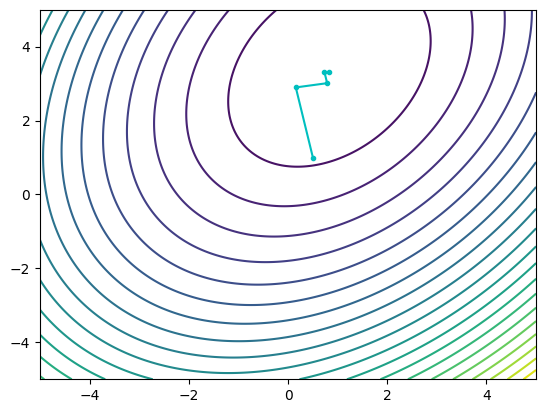

[0.82305702 3.30195704]


In [14]:
if __name__ == "__main__":
    n = 2
    dx = 0.0000001
    f = lambda x : (2 * x[0] - 2 * x[1] + 5) ** 2   + ( 2 * x[0] + x[1] - 5 ) ** 2  
    df = lambda x : grad_f(dx, x, f)
    x0 =[0.5, 1.0]
    x0 = np.array(x0)
    x = np.linspace(-5, 5, 200)
    y = np.linspace(-5, 5, 200)
    X, Y = np.meshgrid(x, y)
    Z = f([X, Y])
    fig, ax = plt.subplots()
    ax.contour(X, Y, Z, levels=20)

    g = df(x0)
    e1 = 0.1
    e2 = 0.15
    M = 10
    ans = Fletcher_Reeves_method(x0, e1, e2, M, f)
    plot = True
    if plot: 
    
        X = []
        Y = []

        ans, array_dots = Fletcher_Reeves_method(x0, e1, e2, M, f, plot)
        for x, y in array_dots:
            X.append(x)
            Y.append(y)
        

        ax.plot(X, Y, marker=".", c="c")
        plt.show()

    print(ans)